# WEEK 04
# Encounter 01 - Working with Timestamps
# Project Challenge - Applying Datetime functions

## Task Description

Examine whether the bicycle count shows any time-related patterns. Create a notebook in which you will solve the following questions:

   1. Extract features like `hour`, `month`, etc. from the datetime column into their own columns

   2. Plot small sections of the count data over time (1 day, 1 week, etc.)

   3. Create a `part_of_day` column for the bike data. It should have the following labels: `morning`, `afternoon`, `evening`, `night`.

   4. Save your new dataset in a csv file (so you can reuse it later on)

   5. Group data by one of the newly created time features and observe grouped means

**Bonus**

   6. Make subset of data which only includes January 2011 observation. Add rolling average of the count to the new subset dataframe and plot the rolling average and count versus time.



In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# reading dc_bikes.csv
bikes = pd.read_csv('../data/dc_bikes.csv', index_col='datetime', parse_dates=True)
bikes

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,156
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,104
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,67


In [19]:
# how big is date range in dataset?
# we have data for 2 years

bikes.index.min(), bikes.index.max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-31 23:00:00'))

### 1. Extract features like hour, month, etc. from the datetime column into their own columns

In [20]:
# hour
bikes['hour'] = bikes.index.hour
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1,4


In [21]:
# month
bikes['month_name'] = bikes.index.month_name()
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month_name
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16,0,January
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40,1,January
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32,2,January
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13,3,January
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1,4,January


In [22]:
# week day name
bikes['day_of_week'] = bikes.index.day_name()
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month_name,day_of_week
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16,0,January,Saturday
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40,1,January,Saturday
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32,2,January,Saturday
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13,3,January,Saturday
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1,4,January,Saturday


In [23]:
# year
bikes['year'] = bikes.index.year
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month_name,day_of_week,year
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16,0,January,Saturday,2011
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40,1,January,Saturday,2011
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32,2,January,Saturday,2011
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13,3,January,Saturday,2011
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1,4,January,Saturday,2011


In [24]:
bikes.index.day_name()

Index(['Saturday', 'Saturday', 'Saturday', 'Saturday', 'Saturday', 'Saturday',
       'Saturday', 'Saturday', 'Saturday', 'Saturday',
       ...
       'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday',
       'Monday', 'Monday', 'Monday'],
      dtype='object', name='datetime', length=17379)

### 2. Plot small sections of the count data over time (1 day, 1 week, etc.)

In [25]:
# Filtering out 1 day data and saving as a DataFrame
bikes_1day = bikes.loc['2012-06-21']
bikes_1day.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month_name,day_of_week,year
datetime,,,,,,,,,,,,,,,
2012-06-21 00:00:00,3,0,1,1,30.34,34.850,70,6.0032,NaN,NaN,76,0,June,Thursday,2012
2012-06-21 01:00:00,3,0,1,1,29.52,34.850,79,8.9981,NaN,NaN,31,1,June,Thursday,2012
2012-06-21 02:00:00,3,0,1,1,29.52,34.850,79,7.0015,NaN,NaN,20,2,June,Thursday,2012
2012-06-21 03:00:00,3,0,1,1,29.52,34.850,74,0.0000,NaN,NaN,15,3,June,Thursday,2012
2012-06-21 04:00:00,3,0,1,1,28.70,33.335,84,6.0032,NaN,NaN,10,4,June,Thursday,2012


In [27]:
bikes_1day['hour'].min(), bikes_1day['hour'].max()

(0, 23)

Text(0, 0.5, 'Customer counts')

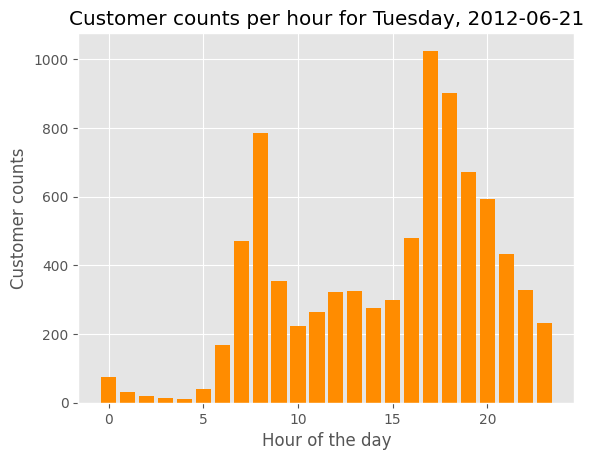

In [47]:
# plotting

x_vals = bikes_1day['hour']
y_vals = bikes_1day['count']

# plotting starts
plt.style.use('ggplot')
plt.figure(figsize=(6.4, 4.8))

plt.bar(x_vals, y_vals, label='Custmer counts per hour', color='darkorange')

# title
plt.title('Customer counts per hour for Tuesday, 2012-06-21')

# label names
plt.xlabel('Hour of the day')
plt.ylabel('Customer counts')


### 3. Create a part_of_day column for the bike data. It should have the following labels: morning, afternoon, evening, night.

Parts of the Day @ https://www.britannica.com
        
 * Morning 5 am to 12 pm (noon) ; 
 * Afternoon 12 pm to 5 pm ; 
 * Evening 5 pm to 9 pm ; 
 * Night 9 pm to 4 am.

In [30]:
# bin labels ('part_of_day' values)
# 'night' consists of 2 different intervals
# as far as 'bin_labels' should be unique, adding wierd 'night_dup_label' to fix it later ^_^
bin_labels = ['night', 'morning', 'afternoon', 'evening', 'night_dup_label']

# bin intervals (to apply to 'hour' values)
bin_boundaries = [-0.1, 5, 12, 17, 21, 23.1]

bikes['part_of_day'] = pd.cut(bikes['hour'], bins=bin_boundaries, labels=bin_labels)

In [31]:
bikes.sample(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month_name,day_of_week,year,part_of_day
datetime,,,,,,,,,,,,,,,,
2012-09-17 03:00:00,3,0,1,1,20.50,24.240,77,6.0032,0.0,7.0,7,3,September,Monday,2012,night
2012-04-07 23:00:00,2,0,0,1,18.86,22.725,23,15.0013,32.0,86.0,118,23,April,Saturday,2012,night_dup_label
2012-01-30 17:00:00,1,0,1,1,14.76,17.425,21,12.9980,NaN,NaN,220,17,January,Monday,2012,afternoon
2011-01-02 19:00:00,1,0,0,1,13.12,14.395,42,30.0026,1.0,29.0,30,19,January,Sunday,2011,evening
2011-10-30 20:00:00,4,0,0,1,13.94,18.180,57,0.0000,NaN,NaN,142,20,October,Sunday,2011,evening
2011-12-04 02:00:00,4,0,0,1,10.66,15.150,81,0.0000,11.0,51.0,62,2,December,Sunday,2011,night
2011-08-08 15:00:00,3,0,1,1,34.44,37.880,41,19.9995,40.0,86.0,126,15,August,Monday,2011,afternoon
2012-06-20 19:00:00,2,0,1,1,36.08,39.395,37,16.9979,NaN,NaN,565,19,June,Wednesday,2012,evening
2011-10-07 01:00:00,4,0,1,1,18.04,21.970,88,0.0000,3.0,25.0,28,1,October,Friday,2011,night


In [33]:
# checking current counts per bin label ('part_of_day')
bikes['part_of_day'].value_counts()

morning            5088
night              4276
afternoon          3647
evening            2912
night_dup_label    1456
Name: part_of_day, dtype: int64

In [34]:
# fixing 'night' bin :)
bikes['part_of_day'] = bikes['part_of_day'].str.replace('_dup_label', '')

In [35]:
# checking counts per bin label ('part_of_day') after fixing 'night' bin!
bikes['part_of_day'].value_counts()

night        5732
morning      5088
afternoon    3647
evening      2912
Name: part_of_day, dtype: int64

### 4. Save your new dataset in a csv file (so you can reuse it later on)

In [36]:
bikes.to_csv('../data/bikes_with_bins.csv')

In [41]:
bikes

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month_name,day_of_week,year,part_of_day
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16,0,January,Saturday,2011,night
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40,1,January,Saturday,2011,night
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32,2,January,Saturday,2011,night
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13,3,January,Saturday,2011,night
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1,4,January,Saturday,2011,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,156,19,December,Monday,2012,evening
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,104,20,December,Monday,2012,evening
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,67,21,December,Monday,2012,evening


### 5. Group data by one of the newly created time features and observe grouped means

In [44]:
# grouping by hour

attributes = ['weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

bikes_per_hour = bikes.groupby('hour')[attributes].mean()

In [45]:
bikes_per_hour.head()

,weather,temp,atemp,humidity,windspeed,casual,registered,count
hour,,,,,,,,
0,1.398072,19.163829,22.555234,69.101928,10.837813,10.312088,44.826374,54.721763
1,1.400552,18.833950,22.164454,70.421271,10.630161,6.513216,27.345815,33.743094
2,1.409790,18.637510,21.959224,71.682517,10.352793,4.819196,18.080357,23.051748
3,1.424677,18.577647,21.919792,72.978479,10.112251,2.681293,9.076212,12.229555
4,1.426112,18.311765,21.627475,74.236729,10.439456,1.262443,5.144796,7.236729


In [51]:
bikes_per_hour.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='hour')

Text(0, 0.5, 'Customer average counts')

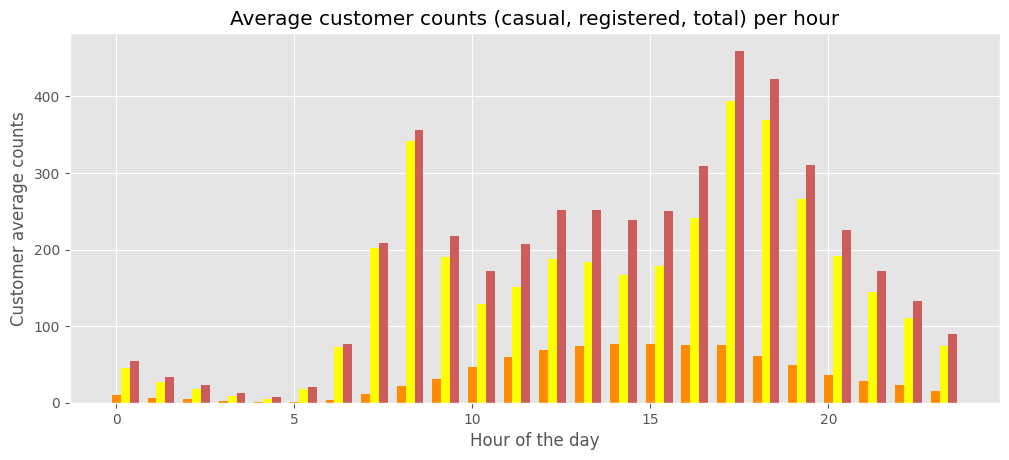

In [69]:
# plotting something

x_vals = bikes_per_hour.index
y_vals_casual = bikes_per_hour['casual']
y_vals_registered = bikes_per_hour['registered']
y_vals_total = bikes_per_hour['count']

# plotting starts
plt.style.use('ggplot')
plt.figure(figsize=(12, 4.8))

plt.bar(x_vals, y_vals_casual, label='avg casual count', color='darkorange', width=0.25)
plt.bar(x_vals+0.25, y_vals_registered, label='avg registered count', color='yellow', width=0.25)
plt.bar(x_vals+0.5, y_vals_total, label='avg total count', color='indianred', width=0.25)

# title
plt.title('Average customer counts (casual, registered, total) per hour')

# label names
plt.xlabel('Hour of the day')
plt.ylabel('Customer average counts')

In [57]:
# grouping by 'part_of_day'
agg_attr = ['casual', 'registered', 'count']

bikes_per_part_of_day = bikes.groupby('part_of_day')[agg_attr].mean()

In [58]:
bikes_per_part_of_day.head()

,casual,registered,count
part_of_day,,,
afternoon,75.440351,232.692982,301.995064
evening,43.942982,243.063596,282.866758
morning,34.662900,181.949780,212.644261
night,8.215517,38.865684,47.257851


In [59]:
# pandas magic to get correct order for 'part_of_day'

# adding additional column with 'index' values and replace them using dictionary

bikes_per_part_of_day['sort_order'] = bikes_per_part_of_day.index
bikes_per_part_of_day

,casual,registered,count,sort_order
part_of_day,,,,
afternoon,75.440351,232.692982,301.995064,afternoon
evening,43.942982,243.063596,282.866758,evening
morning,34.662900,181.949780,212.644261,morning
night,8.215517,38.865684,47.257851,night


In [63]:
# replacing 'part_of_day' values with appropriate sort order

sort_dict = {'morning':0, 'afternoon':1, 'evening':2, 'night':3}
bikes_per_part_of_day['sort_order'] = bikes_per_part_of_day['sort_order'].replace(sort_dict)
bikes_per_part_of_day

,casual,registered,count,sort_order
part_of_day,,,,
morning,34.662900,181.949780,212.644261,0
afternoon,75.440351,232.692982,301.995064,1
evening,43.942982,243.063596,282.866758,2
night,8.215517,38.865684,47.257851,3


In [64]:
# making new sort order permanent
bikes_per_part_of_day.sort_values(by='sort_order', inplace=True)
bikes_per_part_of_day

,casual,registered,count,sort_order
part_of_day,,,,
morning,34.662900,181.949780,212.644261,0
afternoon,75.440351,232.692982,301.995064,1
evening,43.942982,243.063596,282.866758,2
night,8.215517,38.865684,47.257851,3


Text(0, 0.5, 'Customer average counts')

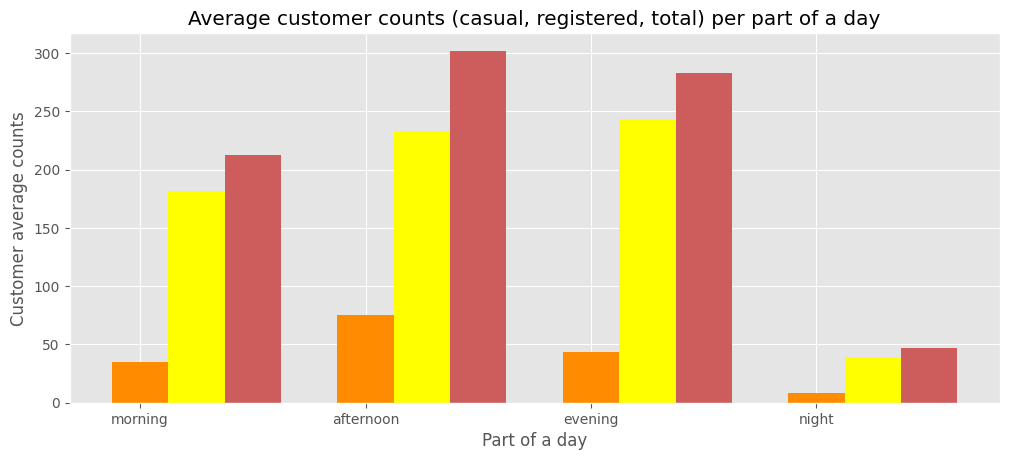

In [78]:
# plotting with seaborn
        
x_vals = bikes_per_part_of_day['sort_order']
x_vals_labels = bikes_per_part_of_day.index

y_vals_casual = bikes_per_part_of_day['casual']
y_vals_registered = bikes_per_part_of_day['registered']
y_vals_total = bikes_per_part_of_day['count']

# plotting starts
plt.style.use('ggplot')
plt.figure(figsize=(12, 4.8))

plt.bar(x_vals, y_vals_casual, label='avg casual count', color='darkorange', width=0.25)
plt.bar(x_vals+0.25, y_vals_registered, label='avg registered count', color='yellow', width=0.25)
plt.bar(x_vals+0.5, y_vals_total, label='avg total count', color='indianred', width=0.25)

# replacing numeric 'part_of_day' x-labels with text
plt.xticks(x_vals, x_vals_labels)

# title
plt.title('Average customer counts (casual, registered, total) per part of a day')

# label names
plt.xlabel('Part of a day')
plt.ylabel('Customer average counts')